In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import h5py
import csv
import math
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.animation as animation
from matplotlib.animation import ArtistAnimation

#dir = '/Users/maedarn/Dropbox/analysis/gravity_solver/telegraph/test-tel/ts-performance-time/cr00064ms032lp001/'
dir = '/Users/maedarn/Dropbox/analysis/flow/telegraph/cr09600ms128lp4e3/'

11185936.414517004 0.0234351412600372 11185936.414517004 0.0234351412600372 11185936.414517004 0.0234351412600372


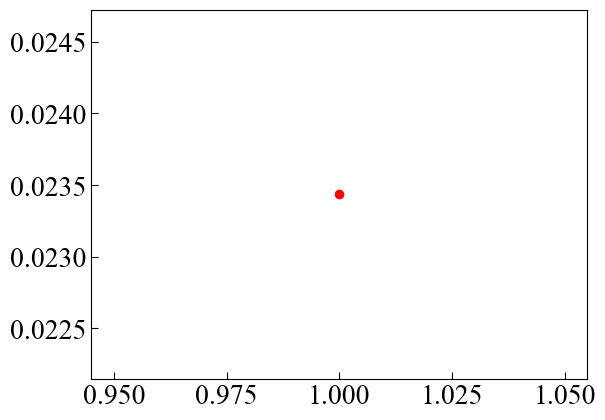

In [13]:
num=3
ncore=1
ncell=64

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

int_list = [x for x in range(1, ncore+1, 1)]  

#print(int_list)
f90= open(dir+'CPU_TIME00000.DAT', 'rb')
ary = np.fromfile(f90, np.float64,count=ncore*num) 
uvhpy = ary.reshape(num,ncore, order='F')
slice1= uvhpy[0,:]
slice2= uvhpy[1,:]
slice3= uvhpy[2,:]
'''
slice4= uvhpy[3,:]
slice5= uvhpy[4,:]
slice6= uvhpy[5,:]
slice7= uvhpy[6,:]
slice8= uvhpy[7,:]
slice9= uvhpy[8,:]
slice10=uvhpy[9,:]
slice11=uvhpy[10,:]
slice12=uvhpy[11,:]
'''

mx3=np.max(slice3)
mn3=np.mean(slice3)
mi3 =np.min(slice3)


#plt.ylim([0.0, 0.00001]) 
plt.plot(int_list,slice3,marker="o",color='red', linewidth = 1) 

#print(slice1,slice2,slice3)
print(ncell*ncell*ncell/mx3, mx3,ncell*ncell*ncell/mn3, mn3,ncell*ncell*ncell/mi3, mi3)

plt.show()

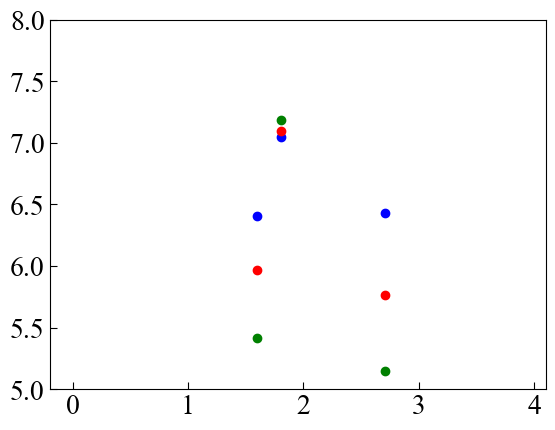

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
#fig.subplots_adjust(bottom=0, left=0, top=1, right=1)

num=3

plt.rcParams["font.family"] = "Times New Roman"      #全体のフォントを設定
plt.rcParams["xtick.direction"] = "in"               #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["ytick.direction"] = "in"               #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["xtick.major.size"] = 5                #x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 5                #y軸主目盛り線の長さ
plt.rcParams["font.size"] = 20                       #フォントの大きさ

scl1=[0] * num
scl2=[0] * num
scl3=[0] * num

prs=[0] * num



scl1[0]=15219728.087345434 
#0.16918492317199707 
scl2[0]=12495770
#0.052483364939689636 
scl3[0]=11185936
#0.012989044189453125

scl1[1]=139420.3961419697 
#0.2350301742553711 
scl2[1]=575764.4620807866 
#0.05691216140985489 
scl3[1]=2672973.539849858 
#0.01225900650024414

scl1[2]=258154.16389833787
scl2[2]=934545.791559139
scl3[2]=2522741.4367107195

prs[0]=64.0
prs[1]=512.0
prs[2]=40.0



scl1=np.log10(scl1)
scl2=np.log10(scl2)
scl3=np.log10(scl3)

prs=np.log10(prs)


plt.xlim([-0.2, 4.1]) # x方向の描画範囲を指定
plt.ylim([5, 8]) # y方向の描画範囲を指定
plt.plot(prs, scl3 ,c='blue',marker="o",linewidth=0)
plt.plot(prs, scl2 ,c='red',marker="o",linewidth=0)
plt.plot(prs, scl1 ,c='green',marker="o",linewidth=0)


#pp = PdfPages('/Users/maeda/Desktop/phi'+"%03.f"%(i)+'.pdf')
pp = PdfPages('/Users/maedarn/Desktop/phierr.pdf')
# 画像をPDFとして保存する
pp.savefig(fig, bbox_inches='tight',transparent=True)
# PDFの保存終了
pp.close()


plt.show()